# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Clustering, PCA, Latent Dirichlet Allocation
Week 7 | Lab 4.3

#### Setup your imports

In [2]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics, datasets
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1: The Iris Dataset

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_scaled = StandardScaler().fit_transform(X)

We will start by going through the iris dataset. This has four dimensions, so if we want to visualise it we will need
to use dimensionality reduction. Let's do that with PCA and see what we get. Turns out most of the variance can
be explained by the first two principal components (check this), so we can just go ahead and use these and we capture most of the information already. So let's go ahead and plot our PCA-reduced dataset, and include the target labels as colours to see if we can notice any structure.

In [10]:
pca = PCA().fit(X)
print(pca.explained_variance_/sum(pca.explained_variance_))
print(sum(pca.explained_variance_[:2]*100)/sum(pca.explained_variance_))

[ 0.92461621  0.05301557  0.01718514  0.00518309]
97.7631775025


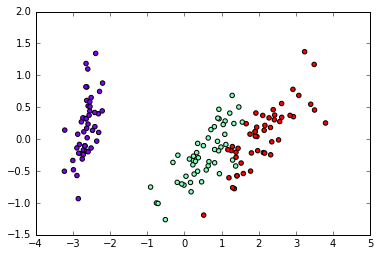

In [29]:
X_pca = pca.transform(X)
PC1 = X_pca[:,0]
PC2 = X_pca[:,1]

import matplotlib.cm as cm
plt.scatter(PC1,PC2,c=y,cmap=cm.get_cmap('rainbow'))
plt.show()

Looks like we have some structure so let's try some clustering to assign the labels. You now have DBSCAN as well as kmeans and hierarchichal clustering so you can try these techniques and see what kind of results you can get. Note that a nice feature of DBSCAN is not having to state the number of clusters in advance (though of course you know the true number in this case, but generally you have an unsupervised problem). If
the labels are assigned the same way as in the original dataset, you could even consider this analagous to a prediction exercise and return a kind of accuracy score (but I stress here that the label assignment from the clustering would be arbitrary, so you would have to compare the labels manually to see if they align with the input before you return any such metrics). Alternatively, you can just eyeball the result. That's certainly what you would be doing normally, since clustering is generally an unsupervised approach in which you simply don't know what the underlying true value should be you are just looking for some structure.

Another point that could be confusing - you can perform your clustering on the PCA reduced dataset, or on the full four dimensional dataset. Since the PCA reduced dataset accounts for 95% of variance explained I do not expect you will see much or any difference in the results (of course a small number of points presumably might be assigned to different clusters in the new 2-dimensional space compared to the 4-dimensional space). But you of course can only readily visualise in the 2 dimensional space, so in this particular example that's the main benefit of PCA to us (don't underestimate the importance of visualising results). But generally reducing dimensions prior to clustering would be beneficial to reduce the fitting to noise.

Labels:
[-1]
Hence number of actual clusters is:
0


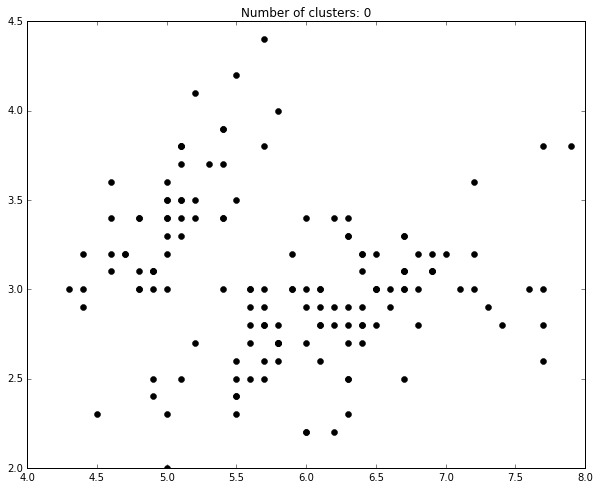

Labels:
[-1  0  1  2  3  4  5  6]
Hence number of actual clusters is:
7
Silhouette Coefficient: 0.069


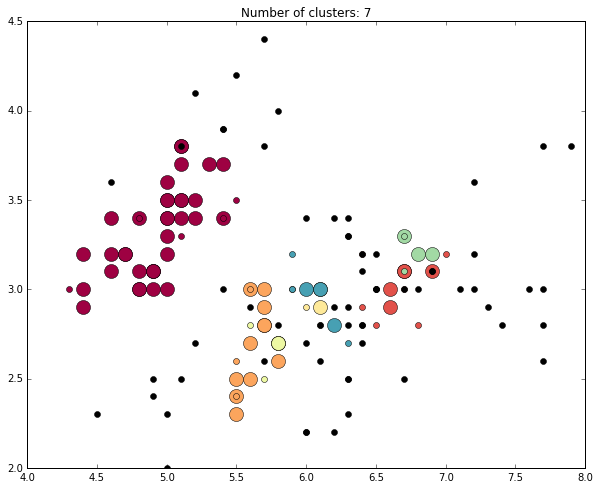

Labels:
[-1  0  1  2]
Hence number of actual clusters is:
3
Silhouette Coefficient: 0.402


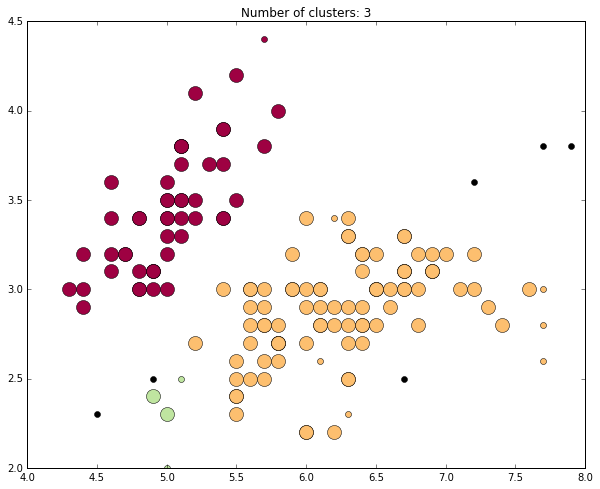

Labels:
[-1  0  1]
Hence number of actual clusters is:
2
Silhouette Coefficient: 0.512


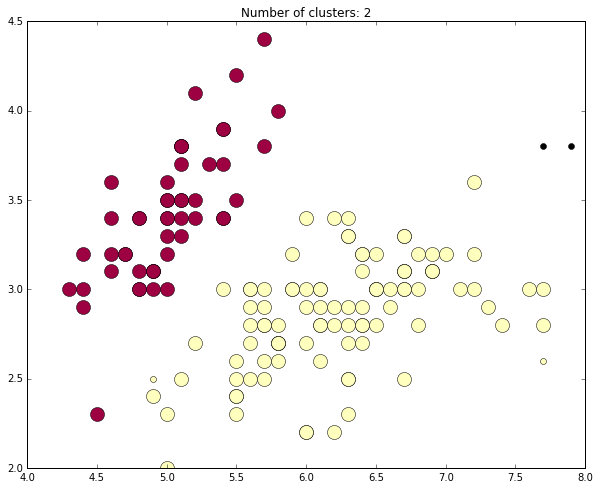

Labels:
[0 1]
Hence number of actual clusters is:
2
Silhouette Coefficient: 0.686


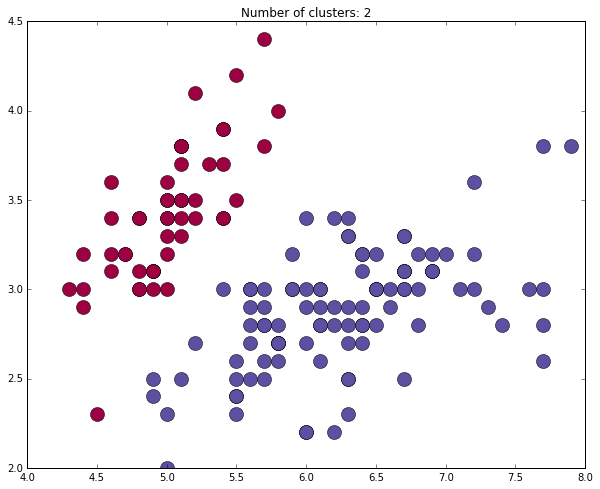

In [50]:
from sklearn.metrics import silhouette_score

for epsilon in np.linspace(0.1,1,5):
    db = DBSCAN(eps=epsilon, min_samples=4)
    db.fit(X)
    core_samples = db.core_sample_indices_
    labels = db.labels_
    print("Labels:")
    print(np.unique(labels))
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print("Hence number of actual clusters is:")
    print(n_clusters)
    if n_clusters > 1:
        print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    fig = plt.figure(figsize=(10,8))
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    plt.title('Number of clusters: %d' % n_clusters)
    plt.show()

You can try the different clustering algorithms to see what different results you can get, and check that you follow the core and border points in DBSCAN. You can also play around with the different algorithms in the next section to get a better intuition for this.

# Part 2: Multiple sklearn datasets

In [51]:
from sklearn import datasets

In [52]:
# This produces some datasets that can deliver different results with different clustering
# algorithms a bit more clearly than the above iris dataset

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

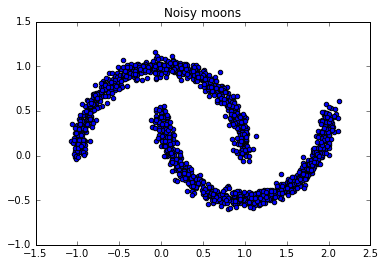

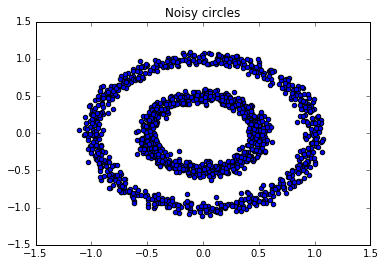

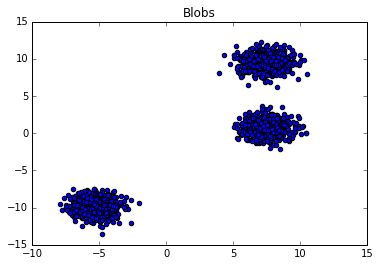

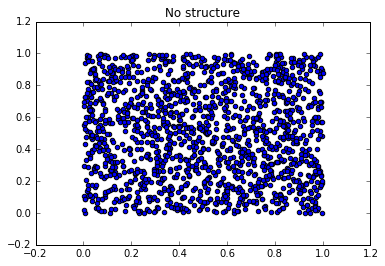

In [53]:
# note that to plot these datasets you have to use a syntax
# like the following with the 0 index first and then referring
# to the x and the y

plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1])
plt.title("Noisy moons")
plt.show()
plt.scatter(noisy_circles [0][:,0], noisy_circles [0][:,1])
plt.title("Noisy circles")
plt.show()
plt.scatter(blobs[0][:,0], blobs[0][:,1])
plt.title("Blobs")
plt.show()
plt.scatter(no_structure[0][:,0], no_structure[0][:,1])
plt.title("No structure")
plt.show()

So, have a play around with the different clustering algorithms and their parameters to get a better feel for their relative performance.

Labels:
[-1  0  1]
Hence number of actual clusters is:
2
Silhouette Coefficient: 0.018


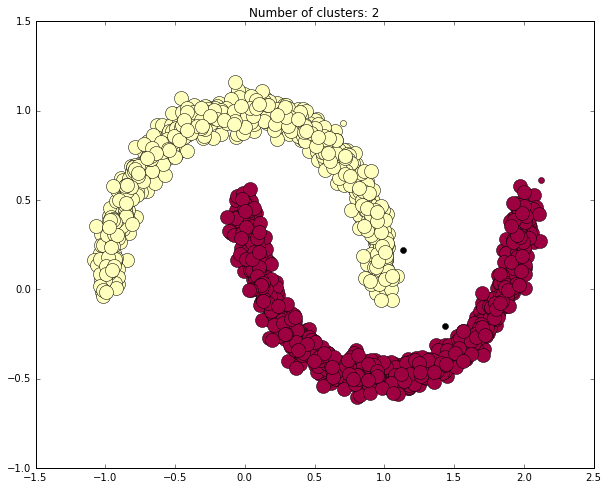

In [56]:
X = noisy_moons[0][:,0:2]
db = DBSCAN(eps=.1, min_samples=4)
db.fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
print("Labels:")
print(np.unique(labels))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Hence number of actual clusters is:")
print(n_clusters)
if n_clusters > 1:
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
fig = plt.figure(figsize=(10,8))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title('Number of clusters: %d' % n_clusters)
plt.show()

Labels:
[0 1]
Hence number of actual clusters is:
2
Silhouette Coefficient: 0.113


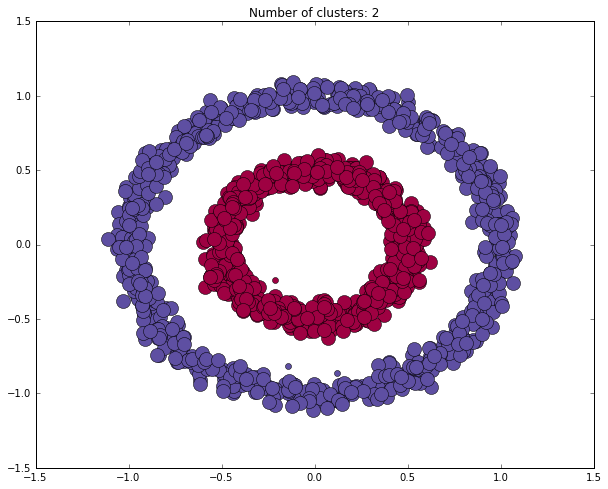

In [57]:
X = noisy_circles[0][:,0:2]
db = DBSCAN(eps=.1, min_samples=4)
db.fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
print("Labels:")
print(np.unique(labels))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Hence number of actual clusters is:")
print(n_clusters)
if n_clusters > 1:
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
fig = plt.figure(figsize=(10,8))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title('Number of clusters: %d' % n_clusters)
plt.show()

Labels:
[-1  0  1  2]
Hence number of actual clusters is:
3
Silhouette Coefficient: 0.716


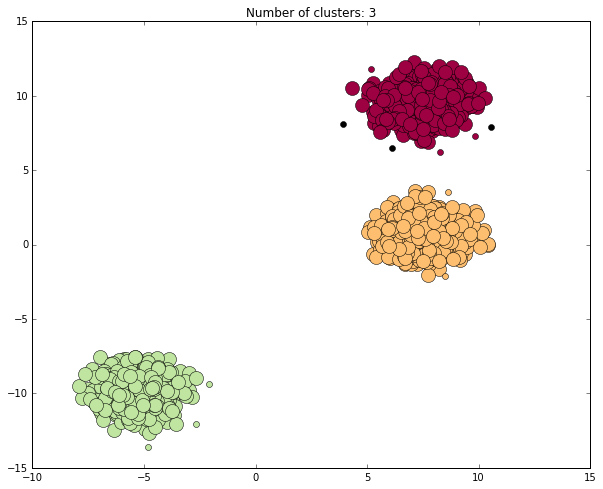

In [62]:
X = blobs[0][:,0:2]
db = DBSCAN(eps=1, min_samples=5)
db.fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
print("Labels:")
print(np.unique(labels))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Hence number of actual clusters is:")
print(n_clusters)
if n_clusters > 1:
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
fig = plt.figure(figsize=(10,8))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title('Number of clusters: %d' % n_clusters)
plt.show()

# Part 3: Airports Dataset

You might want to restart your kernel between parts of this lab, to avoid crossover of variable names.

In [3]:
airport_operations = pd.read_csv("./assets/datasets/airport_operations.csv")
airport_operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


You saw this dataset before. Let's take some columns and see if we can get anything interesting from clustering. This is pretty open ended, and 
represents the kind of task you would often be given as a data scientist - that is to say, speculative exploration of the dataset to see what
kind of potentially interesting patterns you might find that can be leveraged for some commercial advantage.

In [4]:
# Take some columns and scale. We could use the y to label points for visualisation.

X = airport_operations[[
    'percent on-time gate departures',
    'percent on-time airport departures',
    'percent on-time gate arrivals',
    'average_gate_departure_delay',
    'average_taxi_out_time',
    'average taxi out delay',
    'average airport departure delay',
    'average airborne delay',
    'average taxi in delay',
    'average block delay',
    'average gate arrival delay'  
    ]]

X = StandardScaler().fit_transform(X)
y=airport_operations["airport"]

# Bonus Part 4: Dealing with text using PCA and Clustering, and Latent Dirichlet Allocation

So we can look at text using the tools of dimensionality reduction and clustering to produce clusters of topics.  We can also use the popular Latent Dirichlet Allocation which produces a similar output with distinct methodology.

When performing PCA you will come across a difficulty that the sklearn vectorizers for text will return a memory-optimised sparse matrix, in which 0 values are removed. This is because you might expect many such 0 values and given the number of features the size of the matrix can become so large that it is difficult to store in RAM. In our case below we can simply convert our sparse matrix to a dense one, or we can use another PCA algorithm optimised to work with this matrix format called `TruncatedSVD`.

Sparse:
![](./assets/images/sparse.png)

Dense:
![](./assets/images/dense.png)

Note that some of this part of the lab is based on the sklearn documentation you can refer to [here](http://scikit-learn.org/stable/auto_examples/text/document_clustering.html)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.preprocessing import Normalizer
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [6]:
from __future__ import print_function

In [7]:
# Let's just look at a well-separated subset of the categories available.

categories = [
    'rec.autos',
    'talk.politics.mideast',
    'sci.med',
    'rec.sport.baseball']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
docs_raw = dataset.data
labels = dataset.target

In [8]:
# Take a look at one of the documents
docs_raw[1]

u"From: pb6755@csc.albany.edu (BROWN PHILIP H)\nSubject: Re: Bob Dylan Baseball Abstract\nDistribution: na\nOrganization: State University of New York at Albany\nLines: 8\nIn-Reply-To: moakler@romulus.rutgers.edu's message of 21 Apr 93 16:40:44 GMT\n\nI've never heard of the Bob Dylan Baseball Abstract, but I am curious.\nCould someone clue me in?\n\n--\n--------------------------\nPhil Brown                |\naka pb6755@csc.albany.edu |\n--------------------------\n"

Ok, let's fit a vectorizer to get some features. You could use a CountVectorizer or a TfidfVectorizer.

Let's go ahead and see if it's meaningful to cluster on this output already. I'd suggest kmeans to start with since you can sensibly know there are four clusters. You could also try some of the other clustering algorithms.

How do we get word features from this? Well if we sort the clusters we can see those with highest tfidf using `argsort()` and then we can refer to the vectorizer with `get_feature_names` to return the actual word represented by that index.

In [1]:
# Something like this, depending on what you called your clustering

#km.cluster_centers_.argsort()[:, ::-1]

In [2]:
# Note that depending on what you called your vectoriser, you can
# return the particular word represented by any index

#terms = vectorizer.get_feature_names()
#terms[4021]

In [3]:
# So you can use something like the following to return the top words
# depending on namings you used

#order_centroids = km.cluster_centers_.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
#for i in range(4):
#    print("Cluster %d:" % i, end='')
#    for ind in order_centroids[i, :10]:
#        print(' %s' % terms[ind], end='')
#    print()

See if you can make more sense of this with a dimensionality reduction. You could do PCA if you first transform the tfidf output to a dense
matrix with `toarray()`. However it's better optimised to work with TruncatedSVD, which should give you essentially the same output in a more optimised way (it will give slightly different result because the algorithm used is not the same, and you also have to use a `Normalizer` on the output of `TruncatedSVD`). How many dimensions to use? Well, you can compare the `explained_variance_ratio` by summing all the values after the dimensionality reduction and seeing if they are a reasonable proportion of the total for example. When you do the ordering of centroids in this case, you would have to do the inverse transform to return the original indices for the words. You can check the sklearn example to see this (link at the start of this section).

In [4]:
# Try PCA


In [5]:
# Try truncated SVD



Do play around with this and see how you can vary the results, and perhaps visualise them.

Since this can be a bit difficult to work with, I wanted to make sure you got a chance to see LDA. Using the code from the lesson see if you can create a more useer friendly and sensible output using this approach than the clustering.